#Proyecto Aplicado MLDS Unidad 2 Juan Nicolas Mendoza Roncancio


El objetivo del presente video es encontrar patrones en los datos de las masacres presentadas en el marco del conflicto armado colombiano entre los años 1958 y 2022. Además, el objetivo también será generar varios modelos, tanto de clasificación como de regresión, que identifiquen diferentes tipos de masacres en función de las características de cada incidente y el posible número de víctimas. El dataset para trabajar fue obtenido desde el siguiente enlace: https://micrositios.centrodememoriahistorica.gov.co/observatorio/






##Entendimiento del negocio

El conflicto armado colombiano es el gran problema de la historia colombiana, además de esto, no ha parado desde hace más de medio siglo a pesar de la firma del acuerdo de paz con las FARC. Algunas cifras relacionadas que ilustran el conflicto armado entre 1958 y 2022 son:

* Han ocurrido 37,190 acciones bélicas a lo largo de 1,000 que han dejado 49,019 personas fallecidas.

* Las víctimas de asesinatos selectivos han sido: 181,022.

* Ha habido 80,717 desapariciones forzadas.

* 38,040 personas han sido secuestradas.

* 17,770 personas menores de 18 años han sido reclutadas.

* Ha habido 17,332 víctimas de violencia sexual.

El entendimiento de estos datos va más allá de ellos mismos; a pesar de ser representados por números, cada dato representa una persona con sueños, con familia y con vida. Es por esto mismo que el presente proyecto cobra peso y significado: entender el conflicto armado colombiano gracias a las cifras les da peso propio, y encontrar patrones en ellas nos ayuda a comprender la historia de nuestro país para no llegar a repetirla.

Las masacres han sido grandes cicatrices que han marcado poblaciones en nuestro país, hoy en día se sigue reflexionando sobre las mismas; el análisis de datos y los modelos de machine learning orientados al análisis de estas masacres son herramientas para poder entender estos análisis y poder expandirlos.

Así los objetivos de este proyecto son la creación de dos modelos de Machine Learning, uno de clacificaión y el otro de agrupamiento que nos ayuden a comprender y entnder aún mas el fenomeno de las masacres en nuestro país.

## Entendimiento de los datos

Primeramente importaremos las librerías necesarias:

In [ ]:
!pip install -U scikit-learn 
 
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import warnings
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

warnings.simplefilter(action='ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 105
mpl.rcParams['figure.figsize'] = (9, 7)
sns.set_theme()

Y ahora procedemos a importar el archivo donde tenemos nuestros datos:

In [ ]:
datosMA = pd.read_excel('/content/CasosMA_202303.xlsx')

Veamos nuestro dataset:

In [ ]:
datosMA.head()

,ID Caso,ID Caso Relacionado,Año,Mes,Día,Código DANE de Municipio,Municipio,Departamento,Región,Modalidad,...,Extorsión,Lesionados Civiles,Pillaje,Tortura,Violencia Basada en Género,Otro Hecho Simultáneo,Total de Víctimas del Caso,Tipo de Armas,Latitud,Longitud
0,100649,CR030032,1998,1,25,25530,PARATEBUENO,CUNDINAMARCA,PIEDEMONTE LLANERO,RUTA,...,1,0,0,2,NaN,VENTA A BAJO PRECIO.,5,ARMA DE FUEGO,4.374833,-73.212827
1,102446,NaN,2007,10,17,27361,ISTMINA,CHOCO,VALLE DE SAN JUAN,ENGAÑO,...,0,0,0,0,NaN,NaN,4,ARMA DE FUEGO,5.153946,-76.685180
2,105517,NaN,2005,12,7,44430,MAICAO,LA GUAJIRA,ALTA GUAJIRA,ASALTO,...,0,0,0,0,NaN,NaN,4,ARMA DE FUEGO,11.378327,-72.241905
3,105564,NaN,2000,6,18,44430,MAICAO,LA GUAJIRA,ALTA GUAJIRA,SICARIATO,...,0,3,0,0,NaN,NaN,4,ARMA DE FUEGO,11.378327,-72.241905
4,105630,NaN,2002,6,2,44430,MAICAO,LA GUAJIRA,ALTA GUAJIRA,SICARIATO,...,0,0,0,0,NaN,NaN,4,ARMA DE FUEGO,11.378327,-72.241905


Además, podemos usar el métodos info para obtener información general de datosMA.

In [ ]:
datosMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ID Caso                                     4308 non-null   int64  
 1   ID Caso Relacionado                         677 non-null    object 
 2   Año                                         4308 non-null   int64  
 3   Mes                                         4308 non-null   int64  
 4   Día                                         4308 non-null   int64  
 5   Código DANE de Municipio                    4308 non-null   object 
 6   Municipio                                   4308 non-null   object 
 7   Departamento                                4308 non-null   object 
 8   Región                                      4275 non-null   object 
 9   Modalidad                                   4308 non-null   object 
 10  Presunto Res

Podemos ver que es un dataframe bastante completo que presenta pocos datos no nulos, veamos un poco más detalladamente las variables en la siguiente tabla:

| Variable | Definición | Tipo |
| --- | --- | --- |
| ID Caso | ID asociado al caso | Numérico |
| ID Caso relacionado | ID relacionado al caso | Numérico |
| Año | Año | Numérico |
| Mes | Mes | Numérico |
| Día | Día | Numérico |
| Código DANE municipio | Código asociado en el DANE al municipio | Numérico |
| Municipio | Municipio | Categórico |
| Departamento | Departamento | Categórico |
| Región | Región | Categórico |
| Modalidad | Modalidad en la que se realizó la masacre | Categórico |
| Presunto responsable | Presunto responsable de la masacre | Categórico |
| Descripción del presunto responsable | Descripción del presunto responsable de la masacre | Categórico |
| Abandono o Despojo forzado de tierras | Número de casos de abandono o despojo forzado de tierras | Numérico |
| Amenaza o intimidación | Número de casos de amenaza o intimidación | Numérico |
| Ataque Contra Misión Médica | Número de casos de ataque contra misión médica | Numérico |
| Confinamiento o Restricción a la Movilidad | Número de casos de confinamiento o restricción a la movilidad | Numérico |
| Desplazamiento Forzado | Número de casos de desplazamiento forzado | Numérico |
| Extorsión | Número de casos de extorsión en la masacre | Numérico |
| Lesionados Civiles | Número de civiles lesionados | Numérico |
| Pillaje | Número de casos de pillaje | Numérico |
| Tortura | Número de casos de tortura | Numérico |
| Violencias basadas en género | Número de casos de violencias basadas en género | Numérico |
| Otro hecho simultáneo | Si se presentó otro crimen, cuál fue | Categórico |
| Total de víctimas del caso | Total de víctimas en la masacre | Numérico |
| Tipo de arma | Qué arma se usó en la masacre | Categórico |
| Latitud | Latitud de la ubicación de la masacre | Numérico |
| Longitud | Longitud de la ubicación de la masacre | Numérico |

Ya con esto podemos identificar varias variables que no nos aportan la suficiente información para mantenerlas, es por esto que las eliminaremos. Estas columnas son: ID caso, ID caso relacionado, Código DANE de municipio, Violencias basadas en género, Otro hecho simultáneo, Latitud y Longitud.

In [ ]:
datosMA  = datosMA.drop(["ID Caso","ID Caso Relacionado", "Código DANE de Municipio", "Violencia Basada en Género", 
                         "Otro Hecho Simultáneo", "Latitud", "Longitud"], axis = 1)

Vemos también que hay errores en la columna año, que pueden llevar a errores tanto en el análisis exploratorio como en el modelamiento. Es por esto que no las tendremos en cuenta.

In [ ]:
datosMA = datosMA.drop(datosMA.loc[datosMA['Año'] == 0].index)

Una vez eliminadas estas columnas, podemos hacer un análisis exploratorio de los datos.

Podemos preguntarnos cuántas masacres hubo por año y si hay alguna tendencia en el número de masacres a lo largo del tiempo.

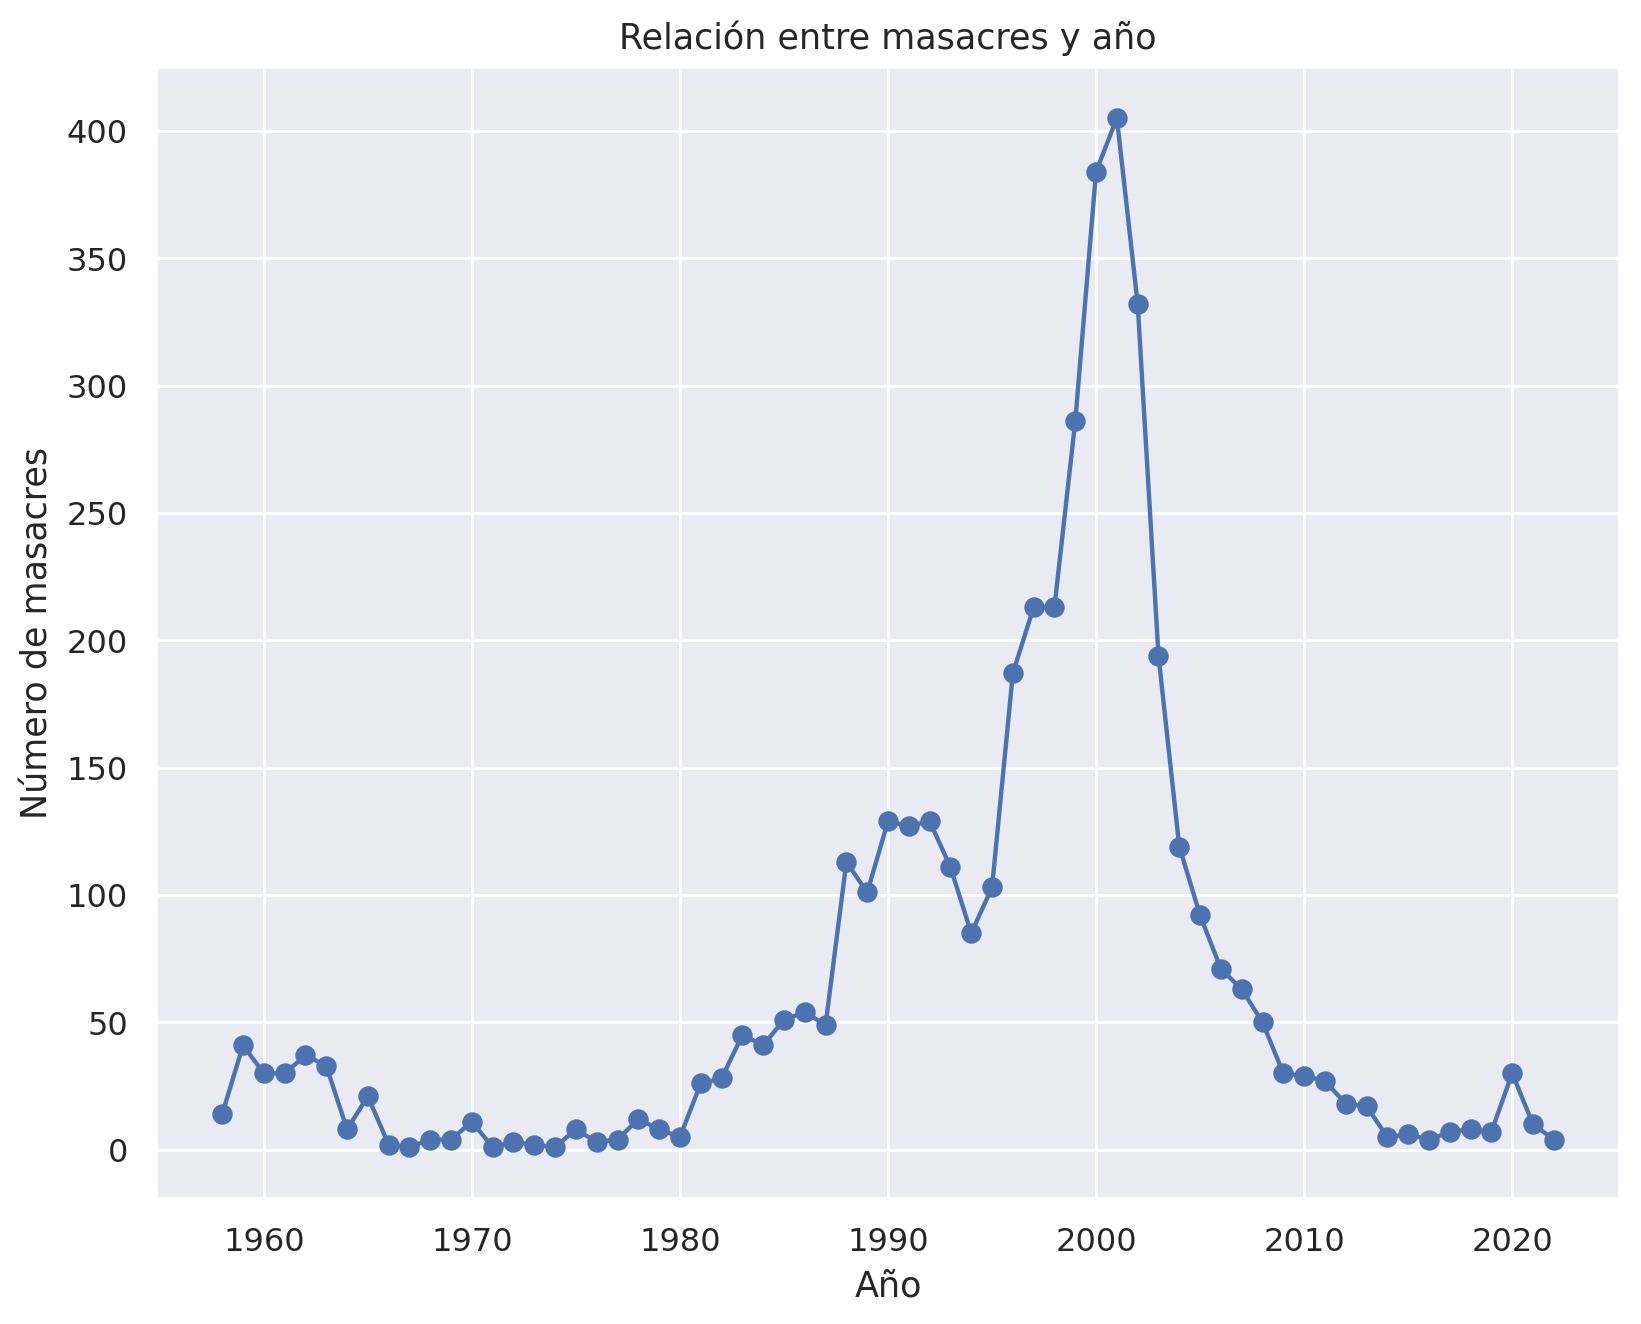

In [ ]:
datosMAaño = datosMA.groupby("Año").count()["Municipio"]

plt.plot(datosMAaño.index, datosMAaño.values, '-o')
plt.xlabel('Año')
plt.ylabel('Número de masacres')
plt.title('Relación entre masacres y año')
plt.show()

Vemos que a partir de los años 80, la tasa de masacres se disparó a un ritmo muy alto, alcanzando su máximo a principios del siglo actual. Luego, se estabilizó a partir de mediados de la época pasada, justo cuando se firmó el acuerdo de paz con las FARC.

Otra pregunta que puede responder el análisis exploratorio de datos es saber cuáles son las regiones que presentan más masacres en nuestro país.

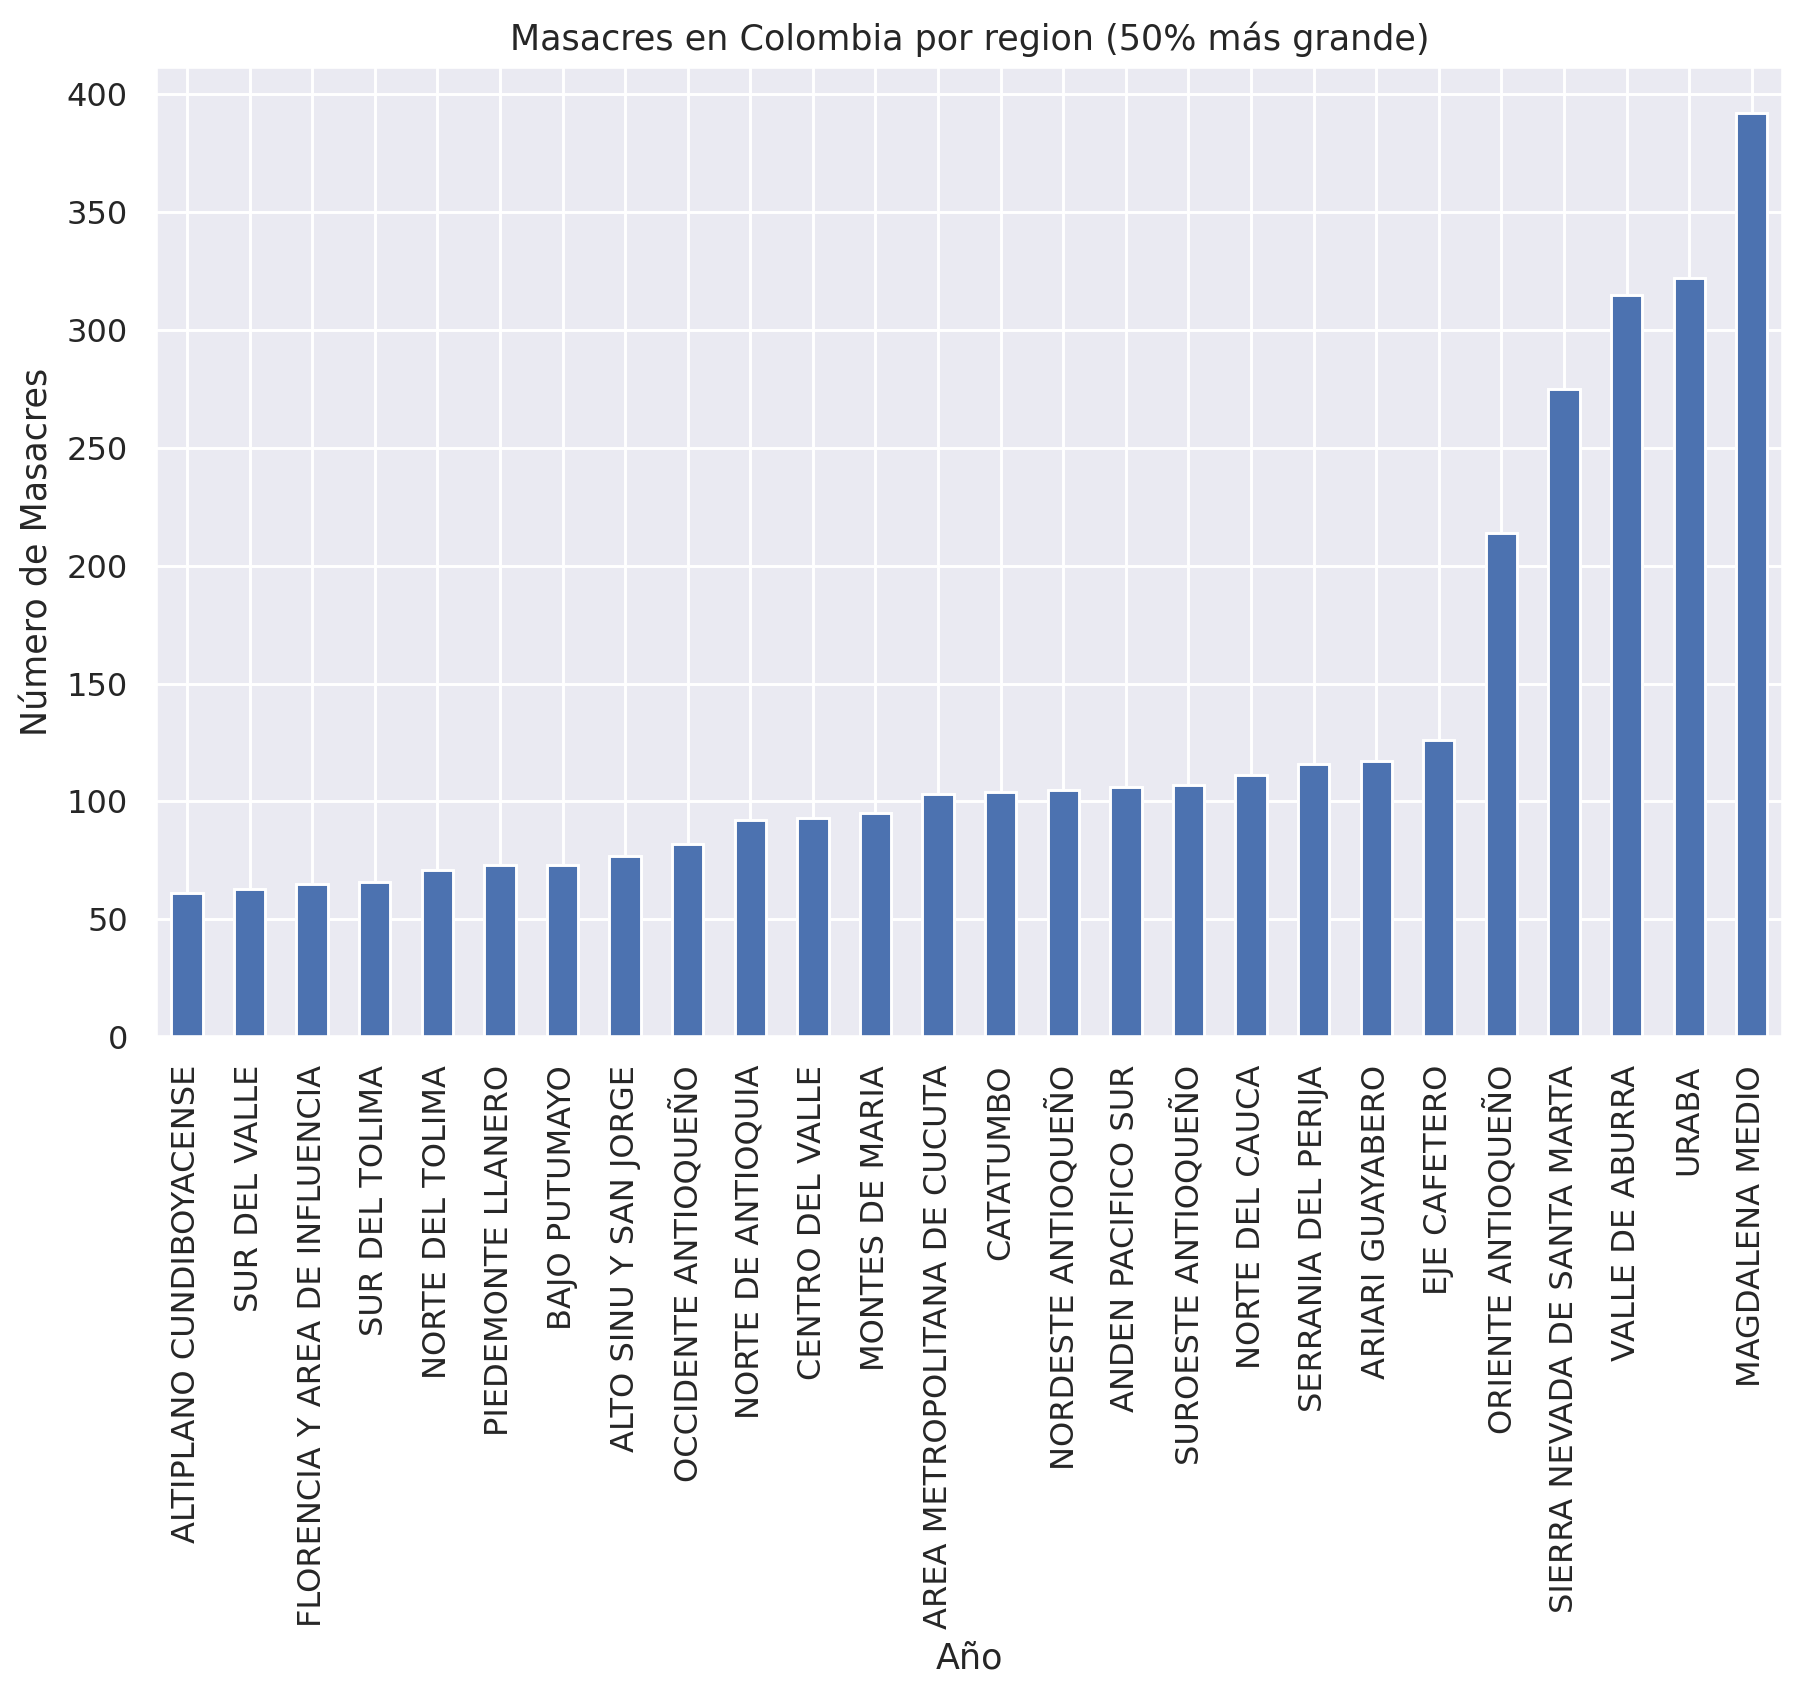

In [ ]:
datosMAregion = datosMA.groupby("Región").count()["Municipio"]
datosMAregionsort = datosMAregion.sort_values()
masacres_50 = datosMAregionsort.mean()

Serie50 = pd.Series()
for i in range(len(datosMAregionsort)):
  if datosMAregionsort.values[i] >= masacres_50:
    Serie50[datosMAregionsort.index[i]] = datosMAregionsort.values[i]

Serie50.plot(kind='bar', figsize=(10, 6))
plt.title('Masacres en Colombia por region (50% más grande)')
plt.xlabel('Año')
plt.ylabel('Número de Masacres')
plt.show()

Vemos entonces que el 50% de las reguiones con más masacres estan exparcidas por gran parte del territorio nacional, sin embargo vemos una gran concentracion en el sur del pais, y reguiones como antioquia y norte de santander.

Veamos cuales son ahora las modalidades más comunes en las masacres del país:

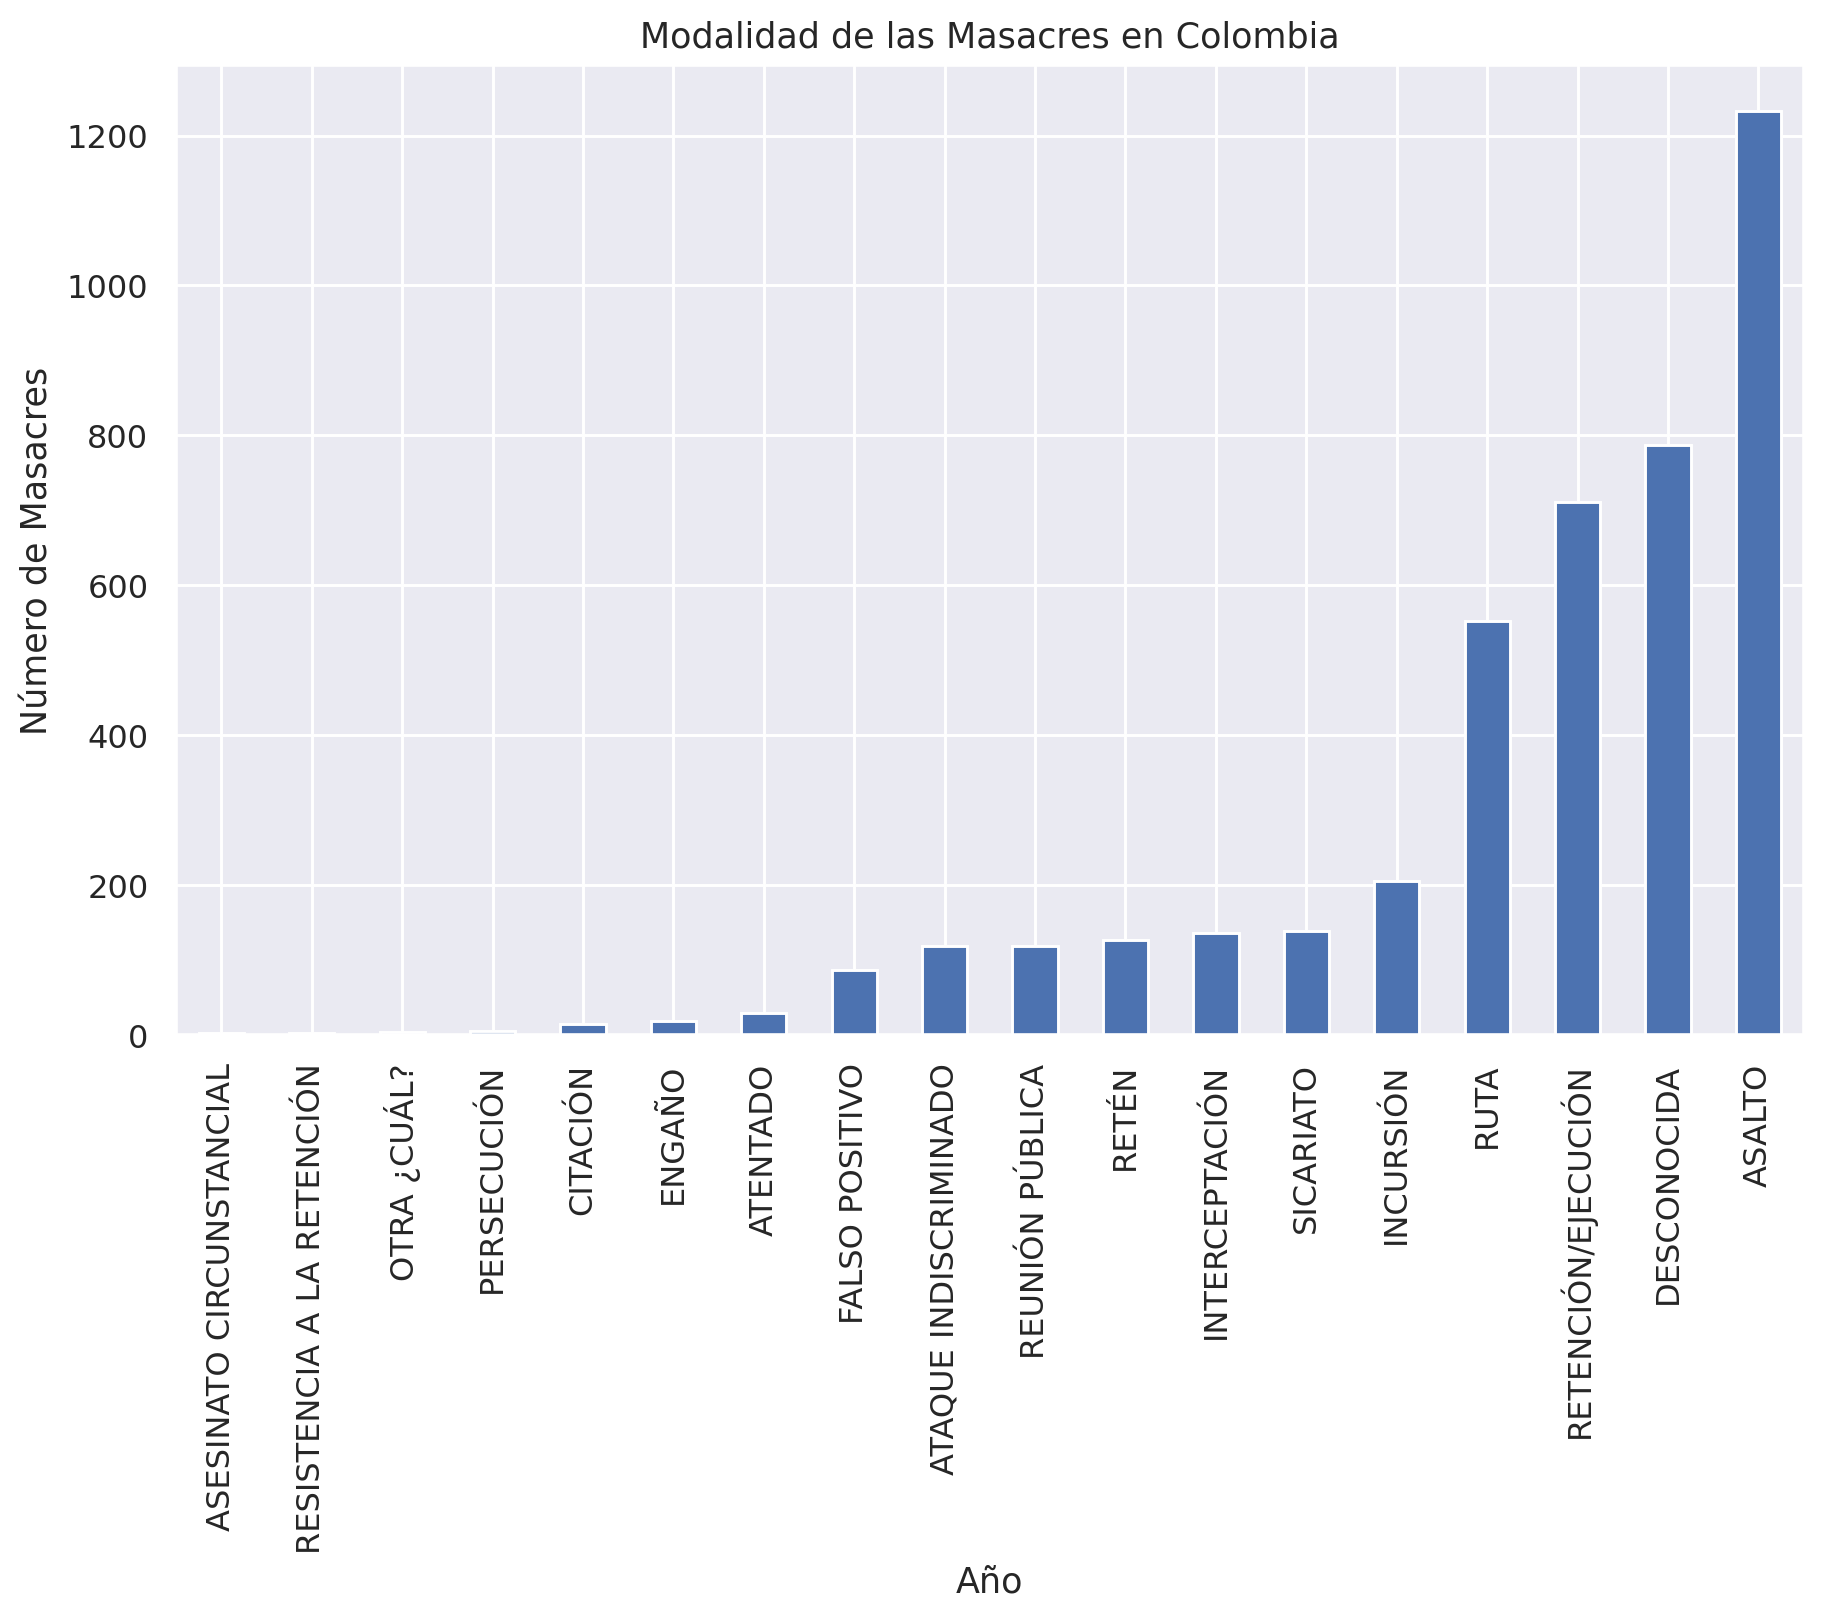

In [ ]:
datosMAmodalidad = datosMA.groupby("Modalidad").count()["Municipio"]
datosMAmodalidad = datosMAmodalidad.sort_values()

datosMAmodalidad.plot(kind='bar', figsize=(10, 6))
plt.title('Modalidad de las Masacres en Colombia')
plt.xlabel('Año')
plt.ylabel('Número de Masacres')
plt.show()

vemos que la segunda causa más común de masacres es desconocida, lo que significa que se debe investigar más para llegar a encontrar las causas verídicas de estas masacres.

Finalmente, veamos como el numero de masacres por presunto responsable:

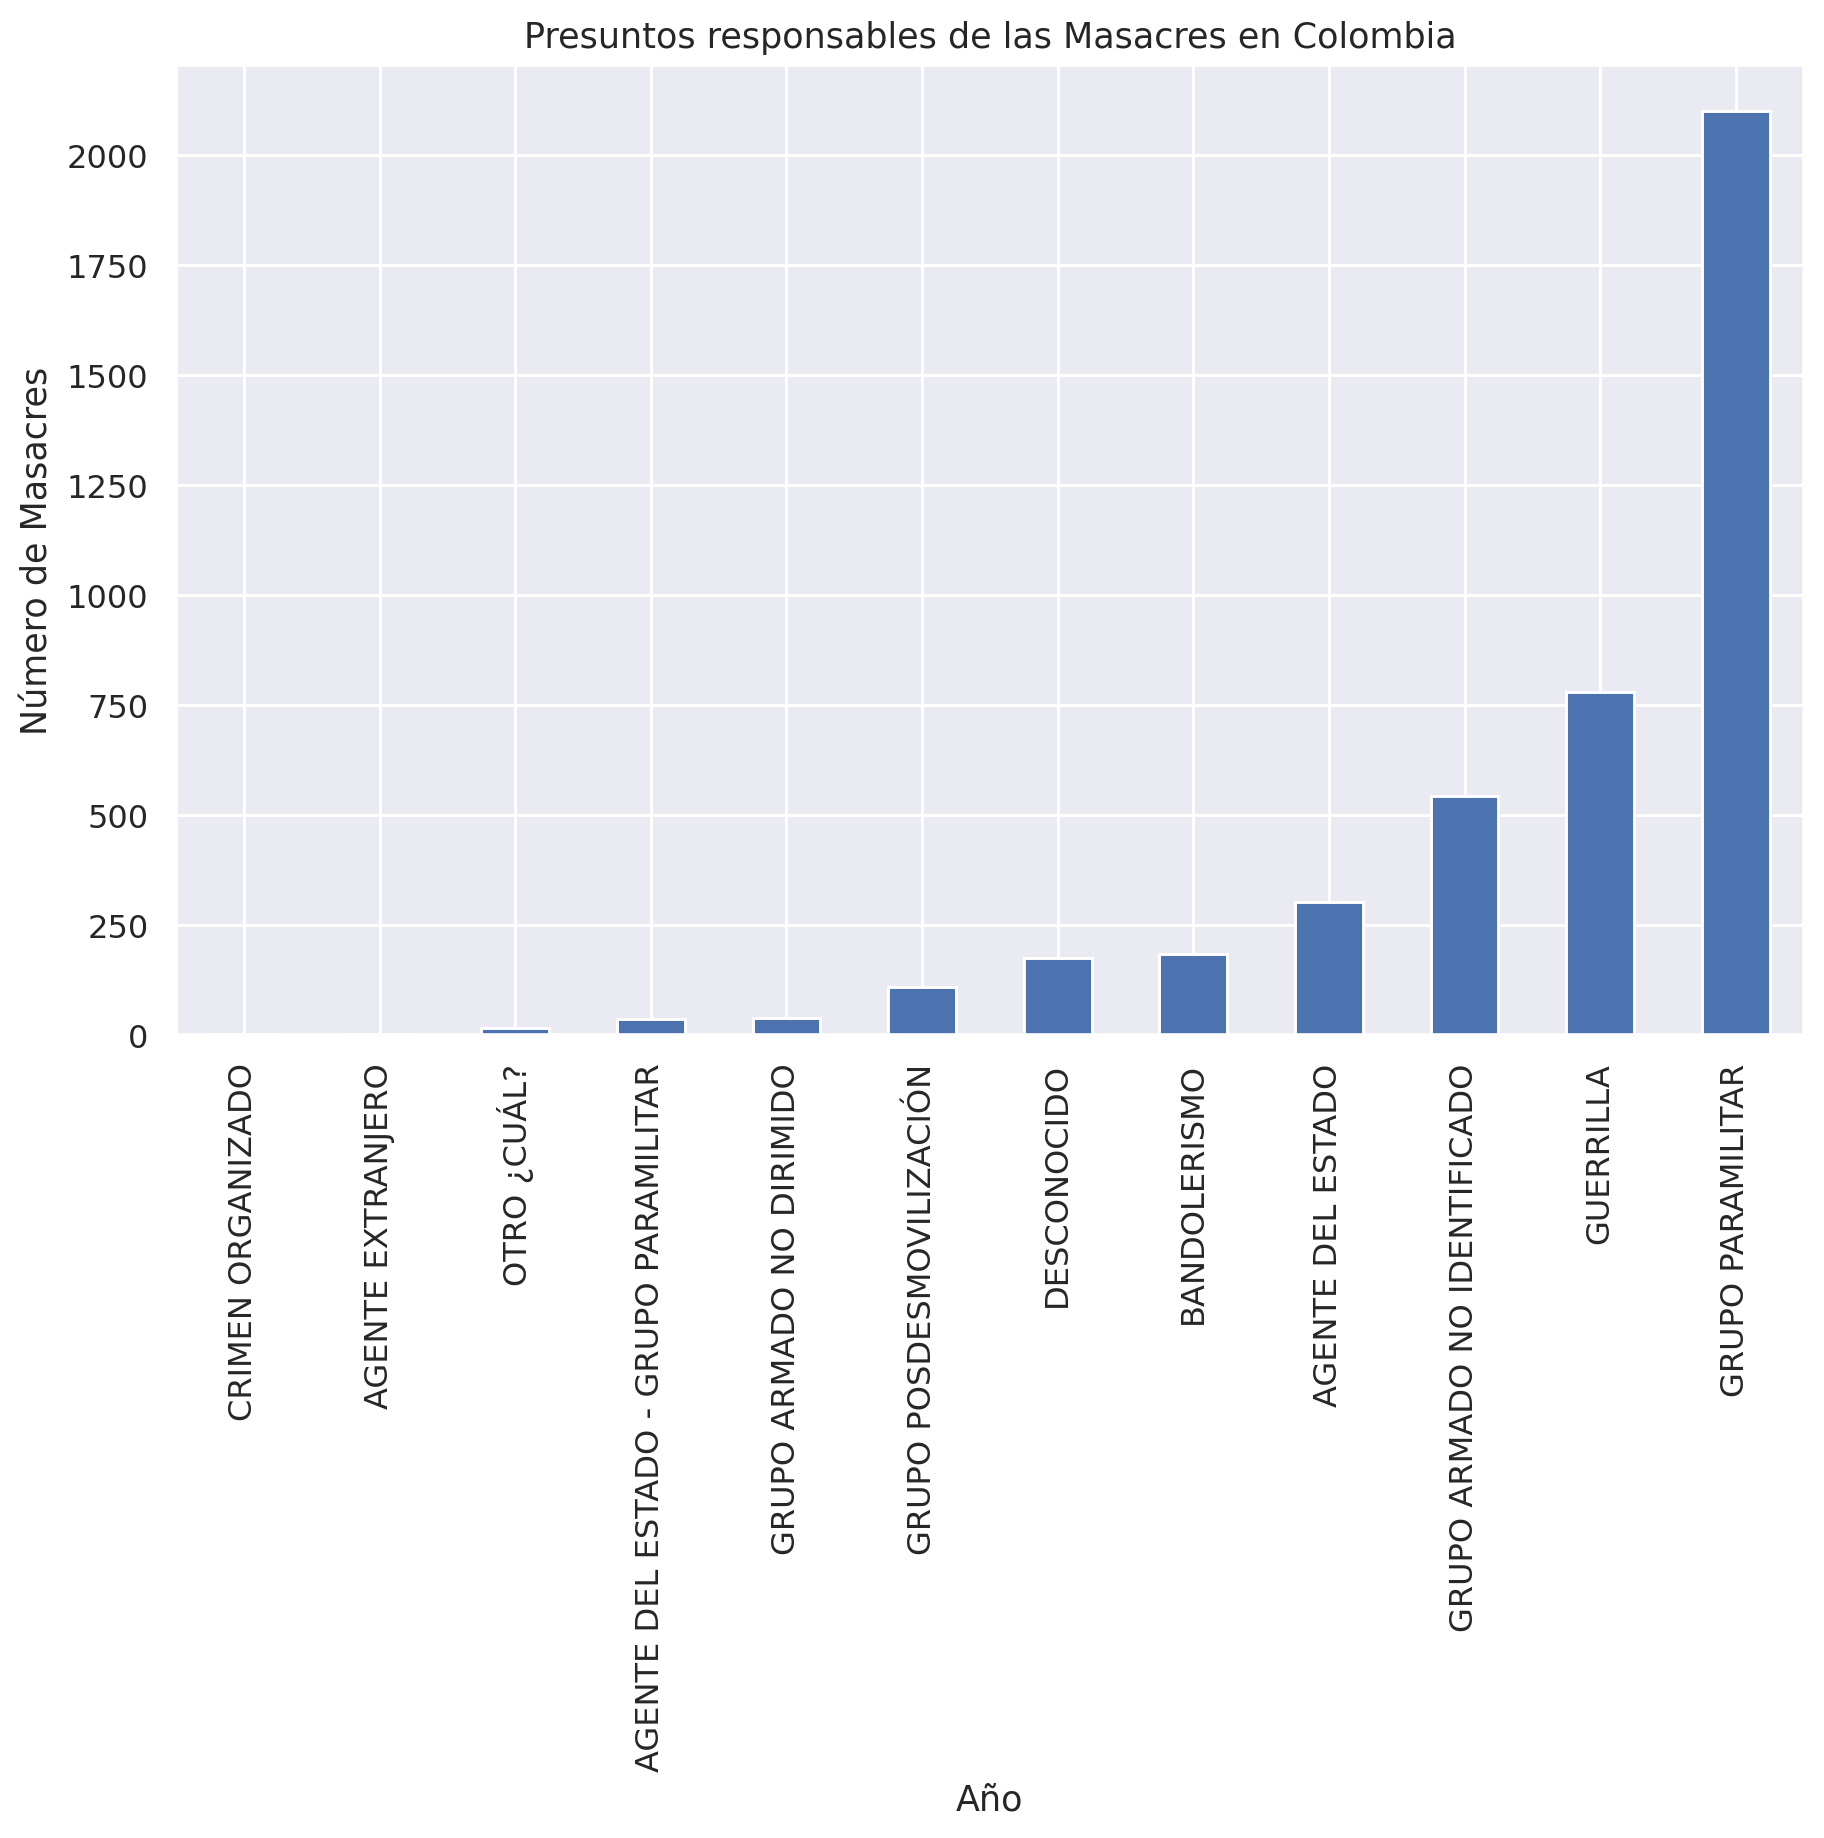

In [ ]:
datosMAmodalidad = datosMA.groupby("Presunto Responsable").count()["Municipio"]
datosMAmodalidad = datosMAmodalidad.sort_values()

datosMAmodalidad.plot(kind='bar', figsize=(10, 6))
plt.title('Presuntos responsables de las Masacres en Colombia')
plt.xlabel('Año')
plt.ylabel('Número de Masacres')
plt.show()

Vemos, como es de esperarse, que los responsables de gran parte de las masacres en nuestro país son los grupos paramilitares, seguidos de la guerrilla. ¿Existe alguna forma de poder identificar el presunto responsable de una masacre? ¿Existen masacres "similares" basadas en diferentes características? ¿Se pueden predecir el número de víctimas de una masacre? Estas son preguntas que responderemos gracias al Machine Learning.

## Modelamiento 

Hemos terminado el análisis exploratorio de los datos con tres preguntas:

* ¿Hay alguna forma de poder identificar el presunto responsable de una masacre?

* ¿Existen masacres "similares" basadas en diferentes características?

Cada una de estas preguntas nos lleva a tipos de modelos diferentes: clasificación y clustering. Realizaremos cada uno de estos para tener un mejor entendimiento del fenómeno de las masacres en el conflicto armado de nuestro país.

Veamos una vez más nuestro dataset:

In [ ]:
datosMA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4286 entries, 0 to 4307
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Año                                         4286 non-null   int64 
 1   Mes                                         4286 non-null   int64 
 2   Día                                         4286 non-null   int64 
 3   Municipio                                   4286 non-null   object
 4   Departamento                                4286 non-null   object
 5   Región                                      4253 non-null   object
 6   Modalidad                                   4286 non-null   object
 7   Presunto Responsable                        4286 non-null   object
 8   Descripción Presunto Responsable            4286 non-null   object
 9   Abandono o Despojo Forzado de Tierras       4286 non-null   int64 
 10  Amenaza o Intimidación  

Primero eliminaremos los valores faltantes, esto lo haremos tomando las filas que no tienen ningún valor faltante:

In [ ]:
datosMA = datosMA.dropna(how='any')

También eliminaremos las variables relacionadas con la fecha, esto se hace para evitar su uso en el modelo y así evitar crear confusión.

In [ ]:
datosMA = datosMA.drop(columns = ["Año","Mes","Día"])

datosMA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4253 entries, 0 to 4307
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Municipio                                   4253 non-null   object
 1   Departamento                                4253 non-null   object
 2   Región                                      4253 non-null   object
 3   Modalidad                                   4253 non-null   object
 4   Presunto Responsable                        4253 non-null   object
 5   Descripción Presunto Responsable            4253 non-null   object
 6   Abandono o Despojo Forzado de Tierras       4253 non-null   int64 
 7   Amenaza o Intimidación                      4253 non-null   int64 
 8   Ataque Contra Misión Médica                 4253 non-null   int64 
 9   Confinamiento o Restricción a la Movilidad  4253 non-null   int64 
 10  Desplazamiento Forzado  

Antes de continuar definiremos alfunas funciones con las cuales ya somos familiares gracias al trabajo previo:

In [ ]:
def cumulative_explained_variance_plot(expl_variance):

  cum_var_exp = np.cumsum(expl_variance)

  plt.figure(dpi = 100, figsize = (8, 6))
  plt.title('Curva acumulativa de la varianza explicada VS n° de componentes principales', 
            fontdict= dict(family ='serif', size = 16))
  plt.xlabel('Número de componentes principales',
             fontdict= dict(family ='serif', size = 14))
  plt.ylabel('Varianza explicada acumulativa',
             fontdict= dict(family ='serif', size = 14))  

  nc = np.arange(1, expl_variance.shape[0] + 1)

  plt.plot(nc, cum_var_exp, '--r')
  plt.plot(nc, cum_var_exp, 'c*', ms = 5)   
  plt.show()

In [ ]:
def plot_metric(K, scores, metric_name):
  plt.figure(dpi=110, figsize=(9, 5))
  plt.plot(K, scores, 'bx-')
  plt.xticks(K); plt.xlabel('$k$', fontdict=dict(family = 'serif', size = 14));  plt.ylabel(metric_name, fontdict=dict(family = 'serif', size = 14));
  plt.title(f'K vs {metric_name}', fontdict=dict(family = 'serif', size = 18))
  plt.show()

### Clasificación



Lo primero que haremos será dividir nuestro conjunto de datos en el formato X e y, donde y será el presunto responsable de la masacre y X serán las demás características.

In [ ]:
datosMA_X = datosMA.drop(['Presunto Responsable'], axis=1)
datosMA_y = datosMA["Presunto Responsable"]

Luego de haber divididó nuestro dataframe, haremos el preprocesamiento de la matriz X:

In [ ]:
categoric = datosMA_X.select_dtypes(include=['object']).columns.tolist()
numeric = datosMA_X.select_dtypes(include=['int64']).columns.tolist()

tf = ColumnTransformer([('onehot', OneHotEncoder(), categoric),
                        ('scaler', StandardScaler(), numeric)])

datosMA_preprocessed = tf.fit_transform(datosMA_X)

También es recomendable pasar de una variable categórica objetivo a su codificación:

In [ ]:
encoder = OneHotEncoder(sparse=False)
datosMA_yprepro = encoder.fit_transform(datosMA_y.values.reshape(-1, 1))

Una vez tenemos nuestros datos preprocesados, pasamos a realizar la búsqueda de mejores hiperparámetros y validación cruzada con un pipeline. Usaremos el modelo de Random Forest, pues es un modelo preciso gracias a su mecanismo de votación, que reduce el sesgo gracias al uso del bagging y además es un buen modelo para conjuntos de datos de altas dimensiones, justamente como el nuestro.

In [ ]:
steps = [('random_forest', RandomForestClassifier())]
pipeline = Pipeline(steps)

parameters = {
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [None, 5, 10],
    'random_forest__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(datosMA_preprocessed, datosMA_yprepro)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'random_forest__max_depth': None, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 300}
Best Score: 0.8182445565770374


### Clusstering

Primero prepocesaremos nuestros datos:

In [ ]:
datosMA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4253 entries, 0 to 4307
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Municipio                                   4253 non-null   object
 1   Departamento                                4253 non-null   object
 2   Región                                      4253 non-null   object
 3   Modalidad                                   4253 non-null   object
 4   Presunto Responsable                        4253 non-null   object
 5   Descripción Presunto Responsable            4253 non-null   object
 6   Abandono o Despojo Forzado de Tierras       4253 non-null   int64 
 7   Amenaza o Intimidación                      4253 non-null   int64 
 8   Ataque Contra Misión Médica                 4253 non-null   int64 
 9   Confinamiento o Restricción a la Movilidad  4253 non-null   int64 
 10  Desplazamiento Forzado  

In [ ]:
variables_categoricas = datosMA.select_dtypes(include=['object']).columns.tolist()
variables_numericas = datosMA.select_dtypes(include=['int64']).columns.tolist()
datosMA_numerico = datosMA[variables_numericas].values
datosMA_categorico = datosMA[variables_categoricas].values

scaler = StandardScaler()  
datosMA_numerico_standarized = scaler.fit_transform(datosMA_numerico) 

enc = OneHotEncoder(sparse=False)   
datosMA_categorico_onehot = enc.fit_transform(datosMA_categorico) 

datosMA_full = np.concatenate((datosMA_numerico_standarized, datosMA_categorico_onehot),axis=1)
print(datosMA_full.shape)

(4253, 875)


Vemos que tenemos muchas dimensiones en nuestra matriz, para mayor facilidad haremos reducción de la dimensionalidad: 

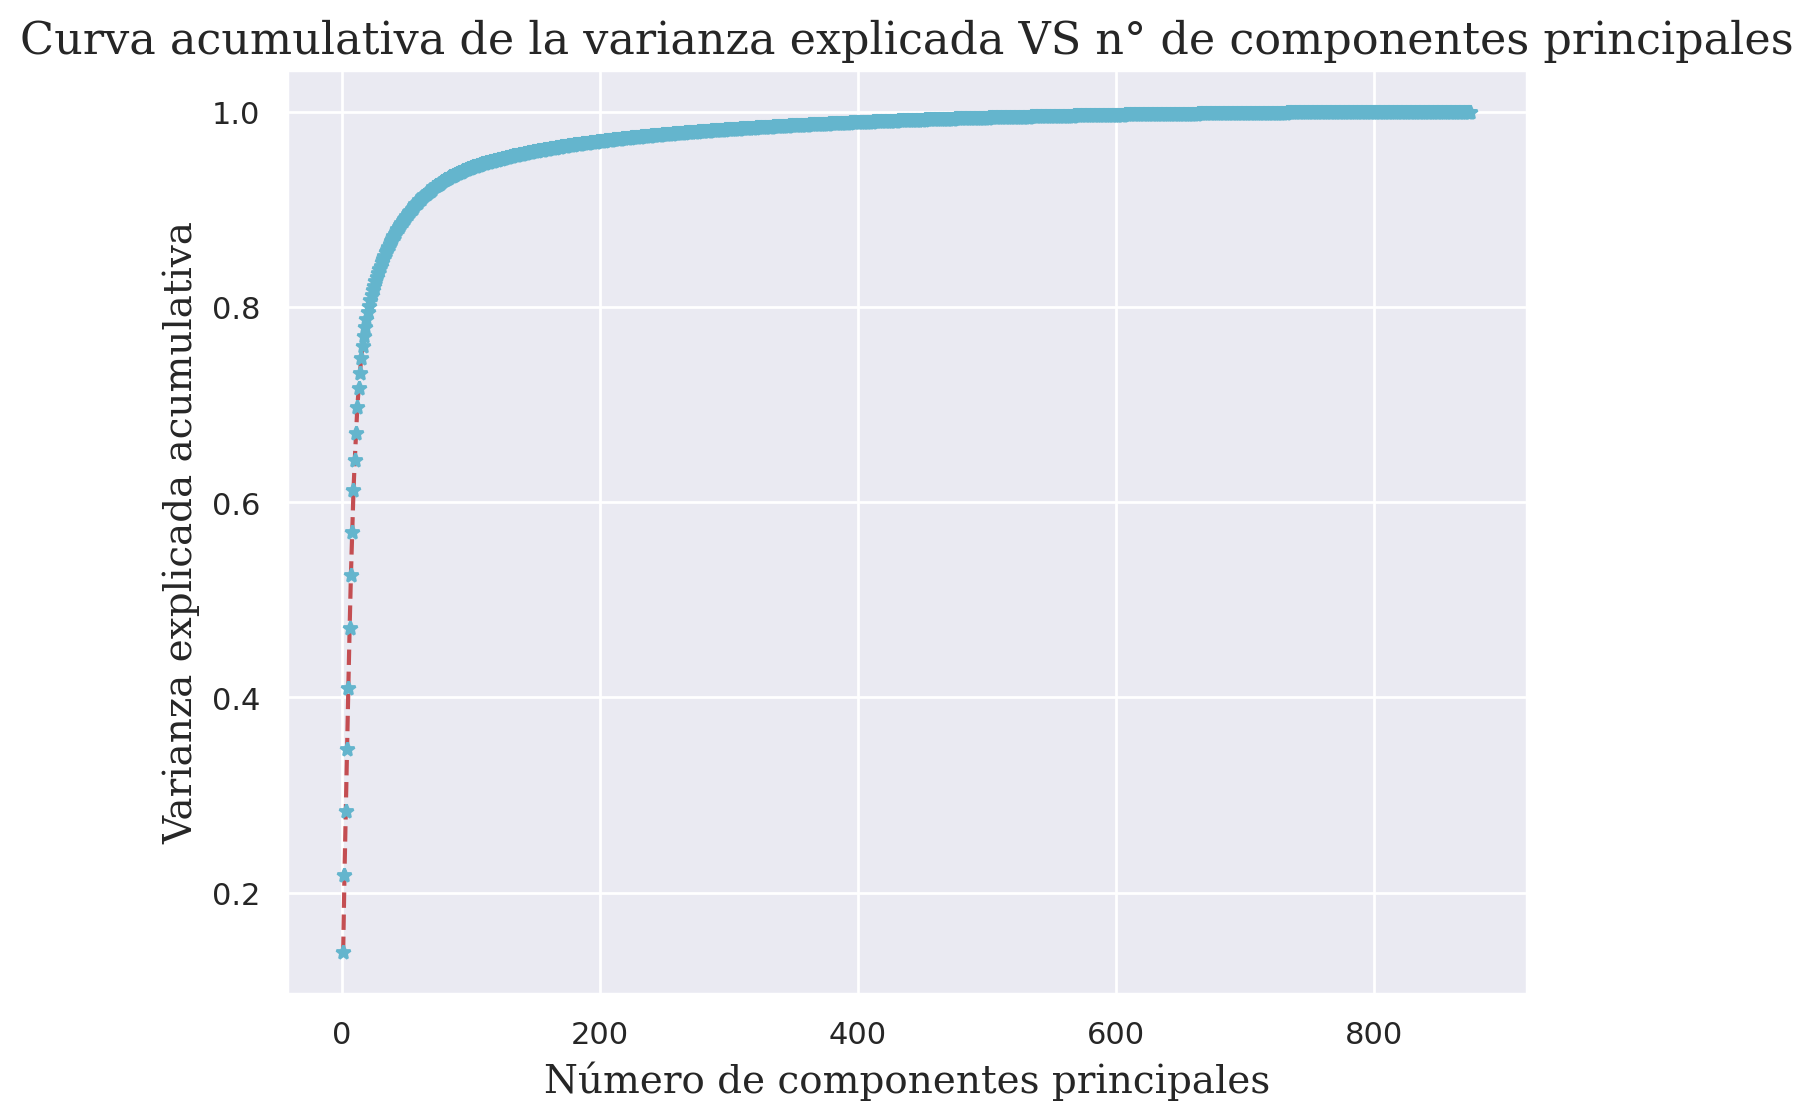

In [ ]:
pca = PCA(n_components=None)
datosMA_full_transf = pca.fit_transform(datosMA_full)
varianza_expl = pca.explained_variance_ratio_

cum_var_exp = np.cumsum(varianza_expl)
cumulative_explained_variance_plot(varianza_expl)

In [ ]:
print(f'Primeras 20 componentes: {cum_var_exp[20]}')

Primeras 20 componentes: 0.8011359462670552


Vemos que con 20 dimensiones obtenemos un 80% de la varianza total, así tomaremos este numero de caraceterísticas:

In [ ]:
num_componentes = 20
pca = PCA(n_components=num_componentes)
datosMA_reducidos = pca.fit_transform(datosMA_full)

Una vez nuestros datos están reducidos y preprocesados, haremos búsqueda de los mejores hiperparámetros para nuestro algoritmo. Utilizaremos una evaluación no supervisada, es decir, analizaremos la inercia y el coeficiente de silueta.

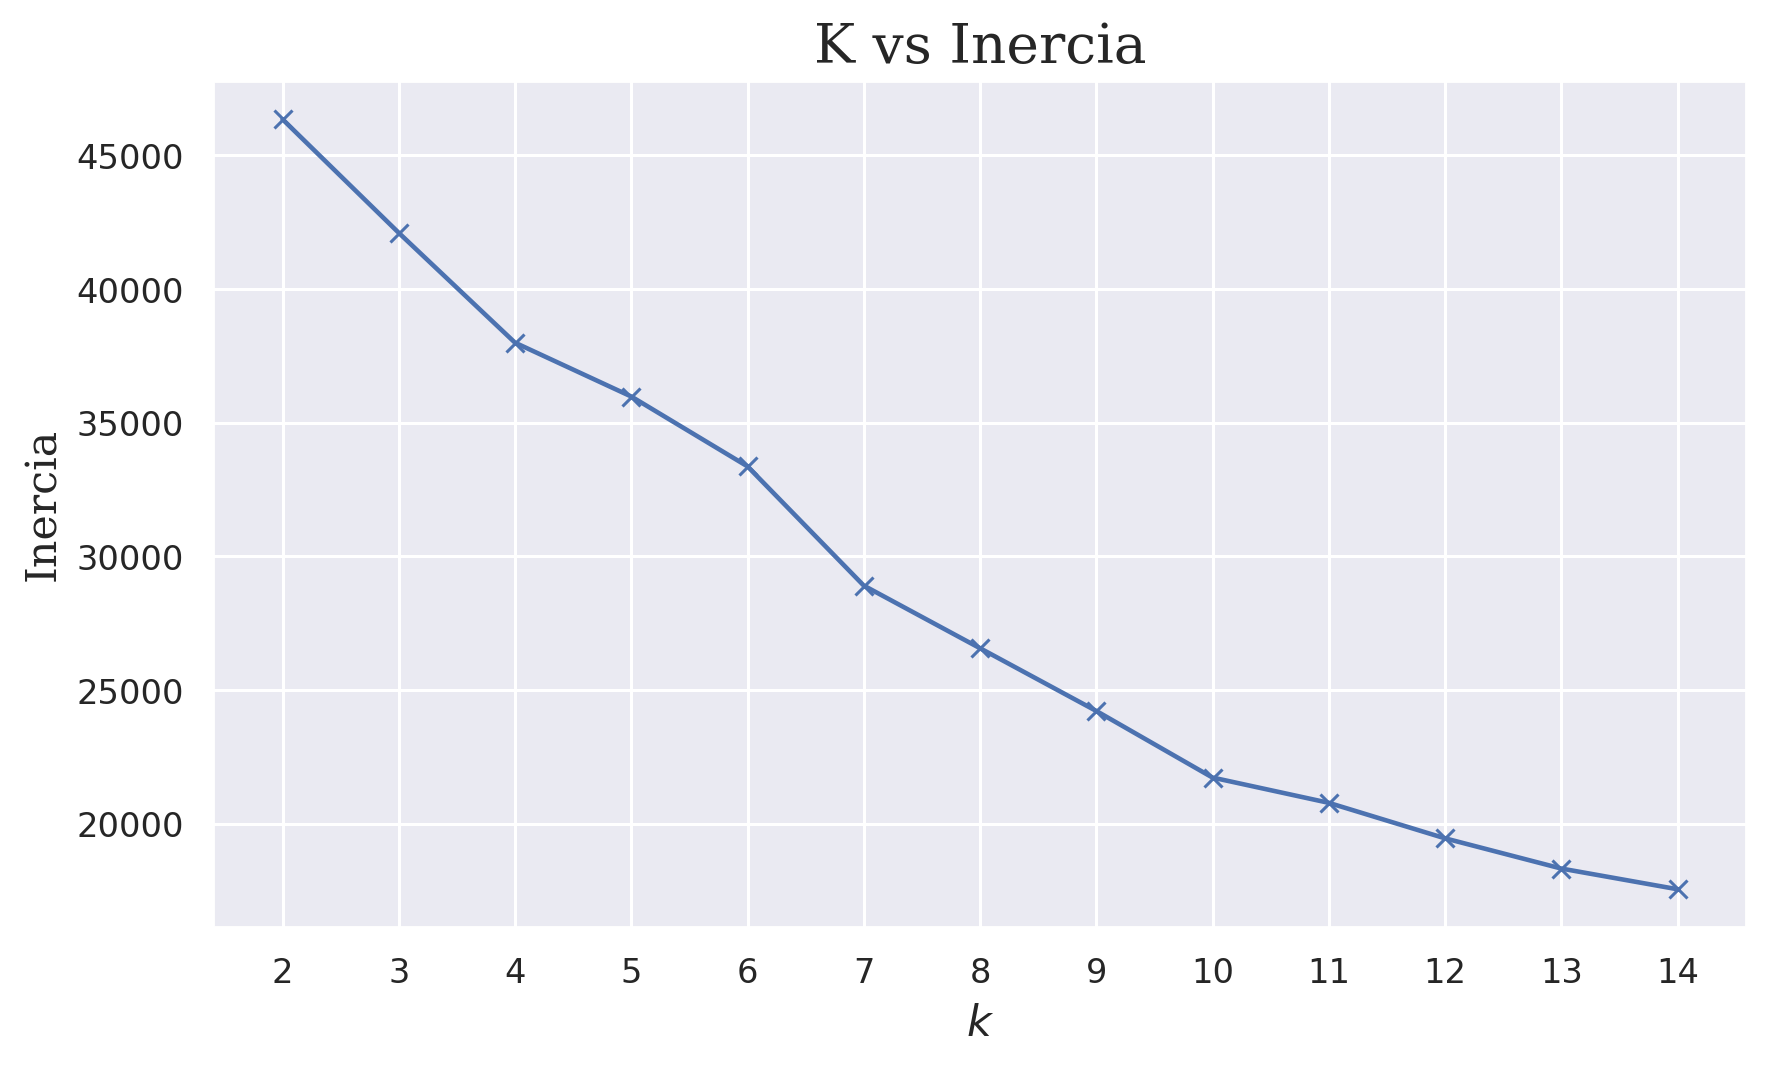

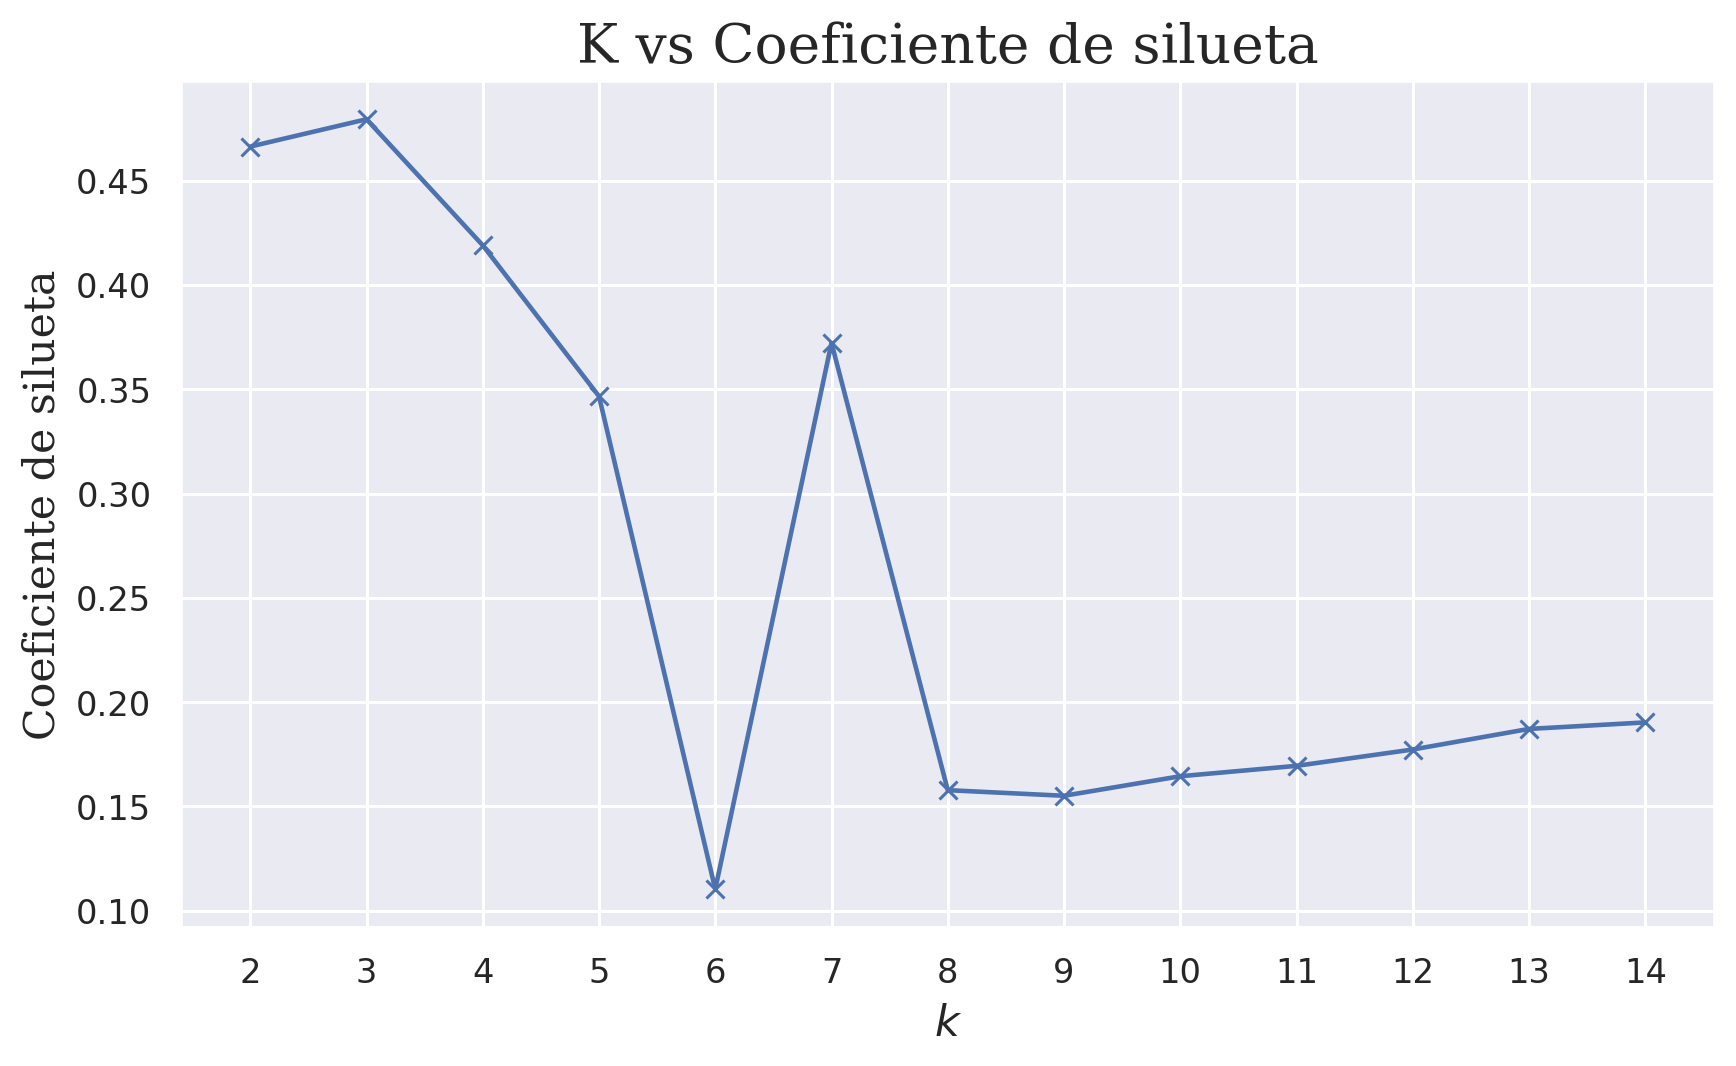

In [ ]:
inertia = []
silhouette = []
K = range(2, 15)
for i in K:
  
  model = KMeans(n_clusters=i)
  model.fit(datosMA_reducidos)

  
  y = model.predict(datosMA_reducidos)


  inertia.append(model.inertia_)
  silhouette.append(silhouette_score(datosMA_reducidos, y))

  
  
plot_metric(K, inertia, 'Inercia')
plot_metric(K, silhouette, 'Coeficiente de silueta')

Así el número de centroides que seleccionamos es k = 3. Mostrando así que hay tres grupos principales de masacres similares. Generenos nuestro modelo:

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(datosMA_reducidos)
centroids = kmeans.cluster_centers_

Ahora queremos hacer el proceso inverso con nuestros centroides, para esto primero aplicaremos el inverso de la reducción de dimensionalidad:

In [ ]:
centroides_originales = pca.inverse_transform(centroids)
centroides_originales

array([[-2.34130109e-01, -2.00590231e-01,  4.94208313e-03, ...,
         1.29439586e-03,  4.67168072e-04,  5.10546675e-04],
       [ 1.93640858e+00,  1.56508486e+00, -3.75165670e-02, ...,
         7.14556242e-03,  5.58318906e-04,  2.46973551e-03],
       [ 5.56385819e-01,  1.19843720e+00, -3.75454741e-02, ...,
         1.76474388e-02, -2.82971539e-06, -6.64137316e-06]])

Ya una vez con nuestros centroides originales en la dimensión original queremos aplicar los inversos de cada una de nuestras transformaciones: One Hot encoder y estandarización:

In [ ]:
reduced_centroids_numeric = scaler.inverse_transform(centroides_originales[:, :len(variables_numericas)])
reduced_centroids_categoric = enc.inverse_transform(centroides_originales[:, len(variables_numericas):])
reduced_centroids_original = np.concatenate((reduced_centroids_numeric, reduced_centroids_categoric), axis=1)
columnasnuvas = variables_numericas + variables_categoricas
centroidestabla = pd.DataFrame(reduced_centroids_original, columns = columnasnuvas)
centroidestabla[variables_numericas] = centroidestabla[variables_numericas].astype(float)
numeric_cols = centroidestabla.select_dtypes(include='number').columns
centroidestabla[numeric_cols] = centroidestabla[numeric_cols].round()
centroidestabla

,Abandono o Despojo Forzado de Tierras,Amenaza o Intimidación,Ataque Contra Misión Médica,Confinamiento o Restricción a la Movilidad,Desplazamiento Forzado,Extorsión,Lesionados Civiles,Pillaje,Tortura,Total de Víctimas del Caso,Municipio,Departamento,Región,Modalidad,Presunto Responsable,Descripción Presunto Responsable,Tipo de Armas
0,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,MEDELLIN,ANTIOQUIA,MAGDALENA MEDIO,ASALTO,GRUPO PARAMILITAR,NO IDENTIFICADO,ARMA DE FUEGO
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,8.0,TIERRALTA,ANTIOQUIA,URABA,RUTA,GRUPO PARAMILITAR,AUTODEFENSAS UNIDAS DE COLOMBIA AUC,ARMA DE FUEGO
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,VALLEDUPAR,ANTIOQUIA,SIERRA NEVADA DE SANTA MARTA,ASALTO,GRUPO PARAMILITAR,AUTODEFENSAS UNIDAS DE COLOMBIA AUC,ARMA DE FUEGO


En este dataframe, podemos ver las coordenadas de cada uno de nuestros centroides. Algunas características interesantes son que todos los centroides se encuentran en regiones cercanas al Pacífico Colombiano. Además, dos de ellos se destacan por la modalidad de asalto, y los tres corresponden a grupos paramilitares. Esto coincide con el análisis exploratorio, donde observamos que los grupos armados de este tipo eran los presuntos responsables de la mayoría de las masacres en nuestro país.

## Evaluación de los resultados:

Hemos realizado dos modelos: El primero, un modelo de clasificación, en el cual predecimos el posible responsable de la masacre. En el segundo, un modelo de agrupamiento, en el cual agrupamos masacre similares. 

A continuación evaluaremos el desempeño de ambos modelos con sus respectivas métricas:

### Clasificación

Para el modelo de clacificacion usaremos las siguientes métricas:

1 - Accuary

2 - Presicion

3 - Sensibilidad

5 - F1-score

Lo haremos como sigue:

In [ ]:
best_params #parametros del modelo
datosMA_preprocessed #datos X
datosMA_yprepro # variables objetivo

Dividimos nuestro conjunto de datos en entrenamiento y prueba:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(datosMA_preprocessed, datosMA_y, test_size=0.3, random_state=42)

Ahora generamos nuestro modelo:

In [ ]:
best_params

{'random_forest__max_depth': None,
 'random_forest__min_samples_split': 2,
 'random_forest__n_estimators': 300}

In [ ]:
model = RandomForestClassifier(max_depth=None, min_samples_split=5, n_estimators=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

metrics_df = pd.DataFrame(data=[[accuracy, precision, recall, f1]], columns=['Accuracy', 'Precision', 'Recall', 'F1'])
metrics_df

,Accuracy,Precision,Recall,F1
0,0.89185,0.880622,0.89185,0.87654


¿Qué podemos deducir de estas métricas? Observamos que nuestro modelo, a pesar de haber buscado los mejores parámetros y haber realizado validación cruzada, tiende a sobreestimar. Esto puede llevar a varios errores al enfrentarse a nuevos datos. Sin embargo, no necesariamente es el peor modelo a la hora de producir los resultados esperados. Hemos desarrollado un modelo capaz de predecir el posible responsable de una masacre, lo cual es muy útil para la búsqueda del esclarecimiento del hecho, ya que nos ayuda a perfilar mejor la búsqueda del responsable.

### Agrupamiento

Hemos creado un modelo de agrupamiento con tres clusters luego de la exploracion de hiperparametros. Ahora mediremos la efectividad de este modelo con las siguientes metricas:

1 - Coeficiente de silueta

2 - Inercia

3 - Índice de Calinski-Harabsz

4 - Índice de Davies- Bouildin.

Generemos nuevamente nuestro modelo

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(datosMA_reducidos)

KMeans(n_clusters=3, random_state=42)

Obtenemos las labels de nuestro modelo:

In [ ]:
labels = kmeans.labels_

Evaluamos las metricas:

In [ ]:
silhouette_avg = silhouette_score(datosMA_reducidos, labels)
inertia = kmeans.inertia_
calinski_score = calinski_harabasz_score(datosMA_reducidos, labels)
davies_bouldin_score = davies_bouldin_score(datosMA_reducidos, labels)

metrics_df = pd.DataFrame(data=[[silhouette_avg, inertia, calinski_score, davies_bouldin_score]], columns=['Coeficiente de silueta', 
                                                                                                           'Inercia'
                                                                                                           , 'Indice CH', 
                                                                                                           'Indice DB'])
metrics_df

,Coeficiente de silueta,Inercia,Indice CH,Indice DB
0,0.479012,42305.010914,547.160611,1.473639


Vemamos lo que nos indica cada una de las metricas:

* Coeficiente de silueta: Al estar cercano a uno los clusters estan bien separados 
* Inercia: La inercia en este caso es alta, lo cual indica que los clusters pueden no ser tan compactos
* Indice CH: Un indice CH alto, como el nuestro, indica una alta separacion entre los clusters
* Indice DB: este indice bajo indica un buen agrupamiento interno de los clusters

En general nuestro modelo es un buen modelo de agrupamiento, es decir que hemos logrado crear un modelo que agrupa masacres similares el cual puede ser usado para identificar patrones a la hora de investigar el fenómeno de las masacres facilitando así la obtención de la verdad de los hechos.

### Conclución

Hemos diseñado dos modelos para ayudar en el esclarecimiento del fenómeno de las masacres. Especialmente si se utilizan simultáneamente, estos dos modelos podrían proporcionar resultados más rápidos. El primer modelo nos indica quién podría haber sido el posible responsable, mientras que el segundo modelo nos dice qué masacres son similares a una determinada. De esta manera, se puede generar un perfil de los responsables y, finalmente, intensificar la búsqueda.